# Random Forest

In [1]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
moviedata = pd.read_csv('Final-CLEAN-Dataset.csv')
moviedata.head(n = 10)

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,Inception,2010s,12,13+,8.8,87,1,Action,United States,English,148
1,2,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
2,3,Avengers: Infinity War,2010s,4,13+,8.5,84,1,Action,United States,English,149
3,4,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
4,5,"The Good, the Bad and the Ugly",1960s,56,18+,8.8,97,2,Western,Italy,Italian,161
5,6,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
6,7,The Pianist,2000s,20,18+,8.5,95,2,Biography,United Kingdom,English,150
7,8,Django Unchained,2010s,10,18+,8.4,87,1,Drama,United States,English,165
8,9,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
9,10,Inglourious Basterds,2000s,13,18+,8.3,89,1,Adventure,Germany,English,153


In [3]:
moviedata.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,2778.500000,14.583693,6.230148,60.207163,1.055796,100.980202
std,1604.023379,13.990212,1.078126,22.265142,0.234205,22.003043
min,1.000000,1.000000,1.100000,2.000000,1.000000,2.000000
25%,1389.750000,5.000000,5.600000,45.000000,1.000000,90.000000
50%,2778.500000,10.000000,6.300000,61.000000,1.000000,99.000000
75%,4167.250000,19.000000,7.000000,77.000000,1.000000,110.250000
max,5556.000000,120.000000,9.000000,100.000000,3.000000,359.000000


In [4]:
# Quantile 25% and 75%
Q1 = moviedata['Runtime'].quantile(0.25)
Q3 = moviedata['Runtime'].quantile(0.75)

#Interquartile range (IQR)
IQR = Q3 - Q1

# Remove the outliers
moviedata = moviedata.drop(moviedata[(moviedata['Runtime'] <= Q1 - 1.5*IQR) | (moviedata['Runtime'] >= Q3 + 1.5*IQR)].index)

In [5]:
moviedata = moviedata.reset_index()
moviedata = moviedata.drop(columns = ['ID', 'index'])
ID = []
for i in range(1, len(moviedata) + 1):
    ID.append(i)
moviedata.insert(0, "ID", ID)

In [6]:
EDA_numeric = ["IMDb", "Rotten", "Runtime", "Availability", "Age of Movie"]

In [7]:
moviedata[EDA_numeric].describe()

,IMDb,Rotten,Runtime,Availability,Age of Movie
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,6.179870,59.836273,100.319018,1.057132,14.524156
std,1.064067,22.375588,14.473748,0.237022,13.671695
min,1.100000,2.000000,60.000000,1.000000,1.000000
25%,5.600000,45.000000,90.000000,1.000000,5.000000
50%,6.300000,60.000000,98.000000,1.000000,10.000000
75%,6.900000,76.000000,109.000000,1.000000,19.000000
max,9.000000,100.000000,140.000000,3.000000,102.000000


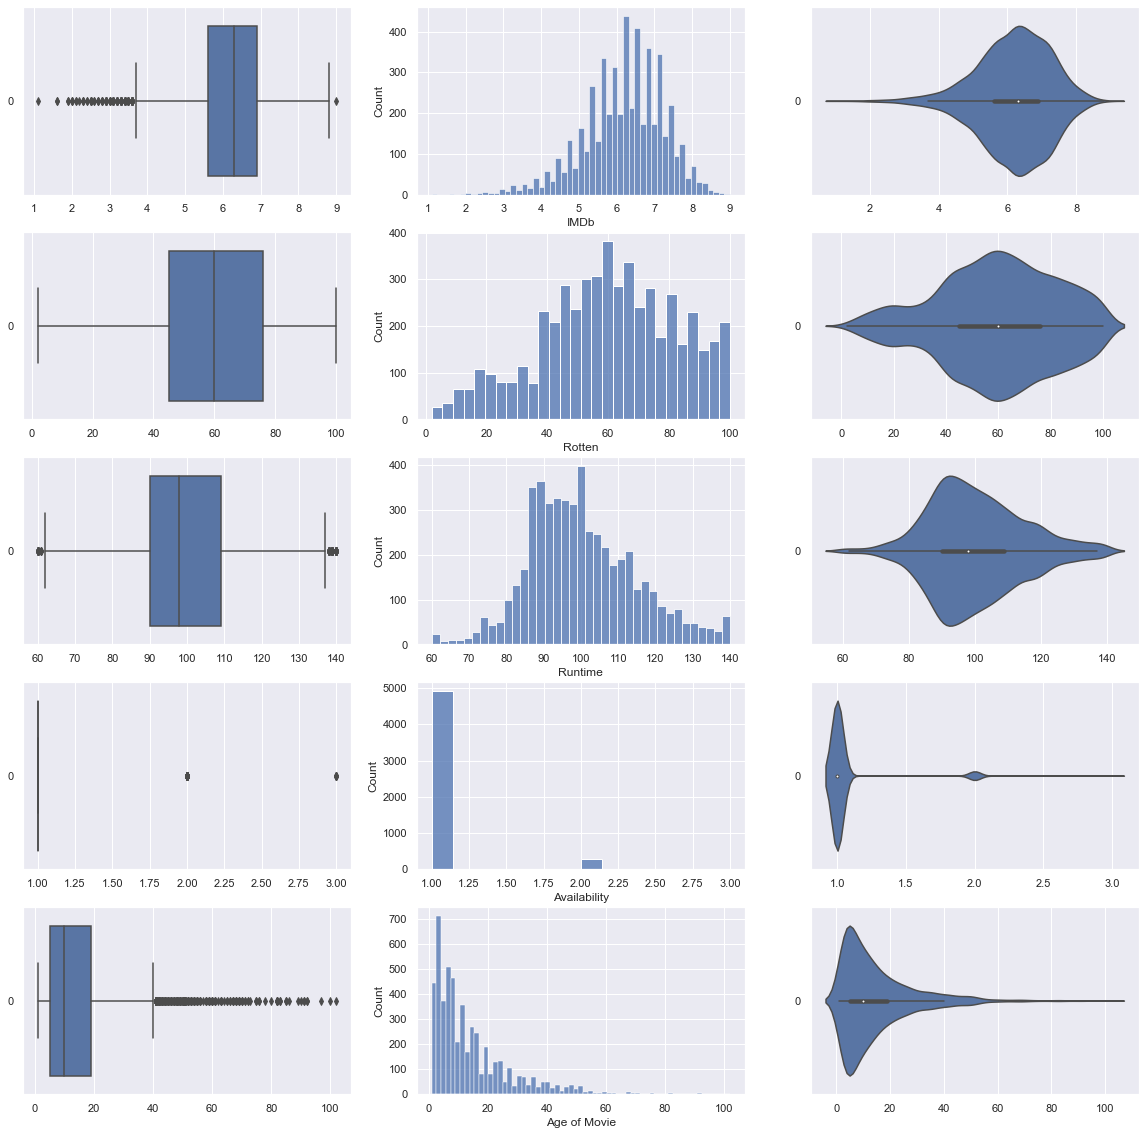

In [8]:
# Draw boxplot, histplot and violinplot of IMDb, Rotten and Runtime
f, axes = plt.subplots(5, 3, figsize=(20, 20))

count = 0
for i in EDA_numeric:
    sb.boxplot(data = moviedata[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = moviedata[i], ax = axes[count,1])
    sb.violinplot(data = moviedata[i], orient = "h", ax = axes[count,2])
    count += 1

## Feature Importance

In [14]:
Feature_df = moviedata[["IMDb", "Rotten", "Runtime", "Availability", "Age of Movie"]]
IMDb_list = []
for i in moviedata["IMDb"]:
    if i >= 7.0:               # Mark good movies with '1' if IMDb >= 7.0
        IMDb_list.append(1) 
    else:                      # Mark bad movies with '0' if IMDb < 7.0
        IMDb_list.append(0)
Feature_df = Feature_df.drop("IMDb", axis = 1)
y_train = IMDb_list[:4170]
X_train = Feature_df[:4170] # 80%
X_test = Feature_df[-1046:]  # 20%

In [15]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train) 
accuracy_rf = random_forest.score(X_train, y_train) * 100
print(accuracy_rf, "%")

99.44844124700239 %


In [16]:
# Use K-fold Cross Validation to see how well random forest performs
rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79616307 0.82014388 0.83213429 0.69064748 0.76019185 0.84172662
 0.85131894 0.75779376 0.76258993 0.76258993]
Mean: 0.7875299760191845
Standard Deviation: 0.047324302670672454


In [17]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': random_forest.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [18]:
importances.head()

,importance
feature,
Rotten,0.467428
Runtime,0.280663
Age of Movie,0.235946
Availability,0.015964


Conclusion: Rotten Tomatoes Score is the most important feature. Meanwhile, Availability is the most insignificant one.